# Business Analytics
## Assignment II

In [2]:
library("magrittr")
library("mlbench")

## 1. Run the following code in R-studio to create two variables X and Y.

In [3]:
set.seed(2017)
X <- runif(100) * 10
Y <- X * 4 + 3.45
Y <- rnorm(100) * 0.29 * Y + Y

### a) Plot Y against X. Include a screenshot of the plot in your submission. Based on the plot do you think we can fit a linear model to explain Y based on X?

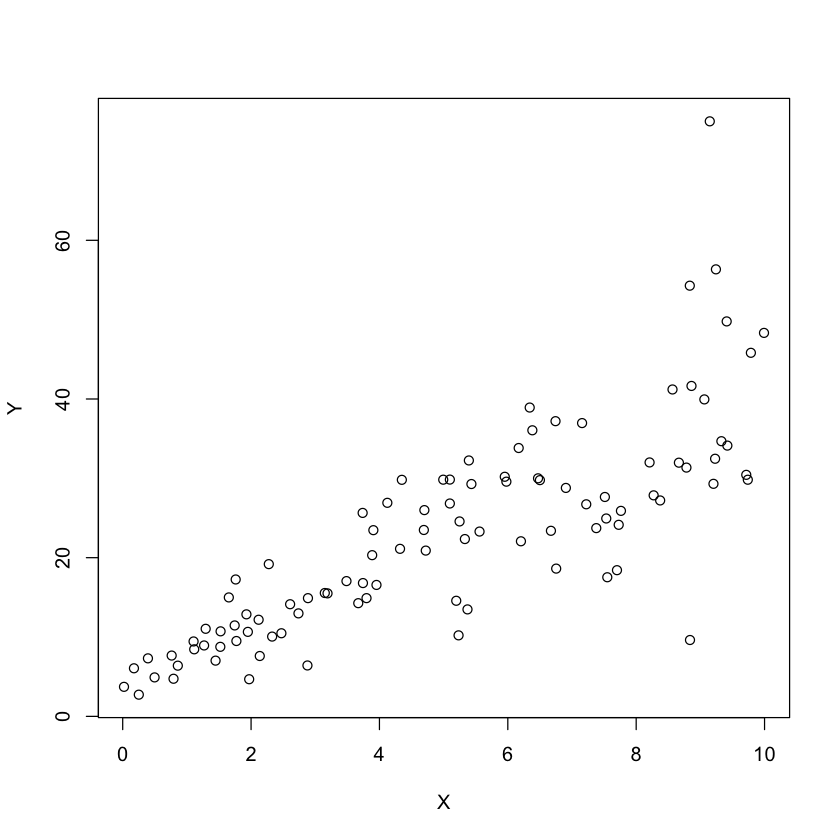

In [4]:
plot(X, Y)

We can first plot a line of best fit on our scatter plot as can be seen below. Since our line of best fit passes through our data fairly well, I can say with confidence that a linear model to explain `Y` based on `X`.

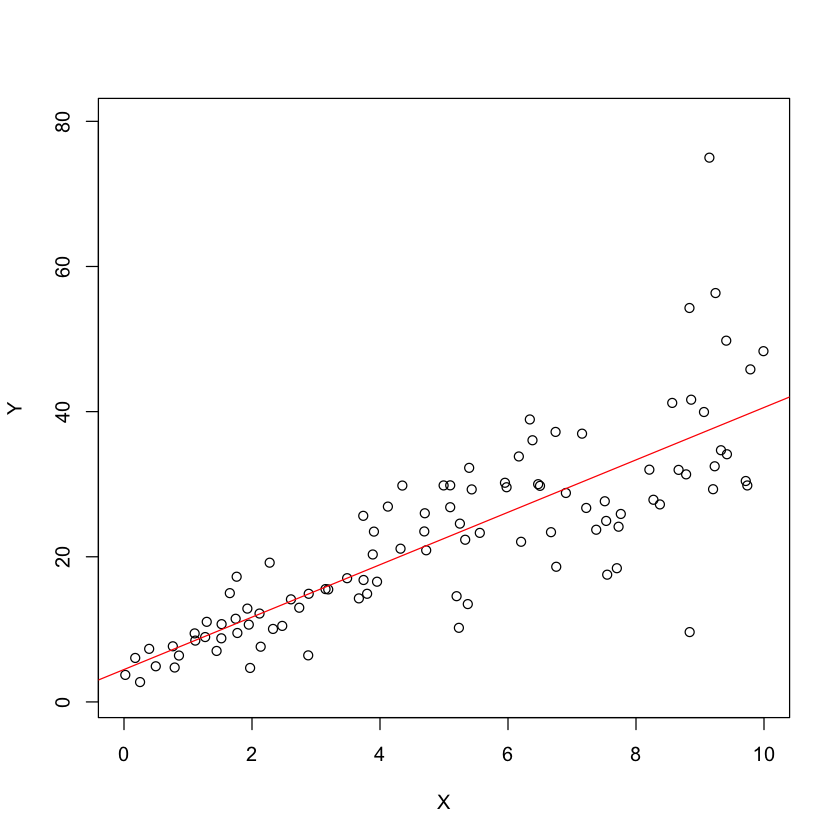

In [5]:
plot(X, Y,
     xlim = c(0, 10),
     ylim = c(1, 80),
     col="black"
)

abline(lsfit(X, Y), col = "red")

### b) Construct a simple linear model of Y based on X. Write the equation that explains Y based on X. What is the accuracy of this model?

In [6]:
lmodel <- lm(Y ~ X)
summary(lmodel)


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.755  -3.846  -0.387   4.318  37.503 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4655     1.5537   2.874  0.00497 ** 
X             3.6108     0.2666  13.542  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.756 on 98 degrees of freedom
Multiple R-squared:  0.6517,	Adjusted R-squared:  0.6482 
F-statistic: 183.4 on 1 and 98 DF,  p-value: < 2.2e-16


The equation of that explains Y based on X is :

`Y = 3.6108 * X + 4.4655`

The equation explains that with every unit change in X, Y will increase by 3.6108 units.

The accuracy of the model can be explained by reading the $r^{2}$ which is __0.6517__ this value means that the model can explain __65.17%__ of the varience of the data.

### c) How the Coefficient of Determination, $r^{2}$, of the model above is related to the correlation coefficient of X and Y?

The correlation coefficient of X and Y is related to the Coefficient of Determiniation in that the value of the Coefficient of Determination is just the correlation coefficient of X and Y sqaured.

In [7]:
cor(Y, X)

[1] 0.807291

In [8]:
r_squared <- 0.6517
derived_r_squared <- cor(Y, X) %>% raise_to_power(2) %>% round(4)

The value of `r_squared` and `derived_r_squared` should be the same therefore an equality check should return `TRUE`

In [9]:
derived_r_squared == r_squared

[1] TRUE

### d) Investigate the appropriateness of using linear regression for this case.

In order to ascertain wether linear regression is appropiate for the data set that we have we must perform some analysis into the residual of the linear model. We first begin our investigation by conduction a resdual analysis

### Residual Analysis

Let's plot the residuals against the observed values of Y

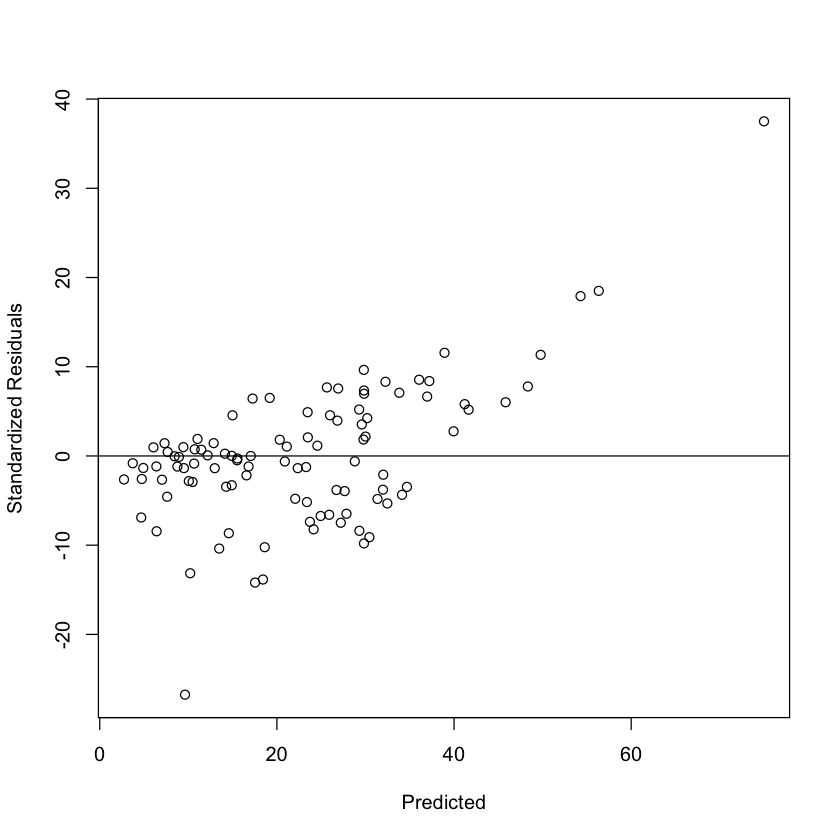

In [10]:
residuals = resid(lmodel)

plot(Y, residuals, ylab="Standardized Residuals", xlab="Predicted") 

abline(0, 0) 

The points seem to be symmetrically distributed where majority of the points are clustered around the middle point. There is presence of some outliers as some of the points gravitate towards the higher points on the Y axis which would mean the model can be improved nonetheless I would say that this residual plot meets the requirement for relatively normal residual plot and with some little tweaking, a linear regression model would be appropiate.

### Normality of Residuals

An important requirement of a regression model is that the residuals obtained from performing the difference between actual observations in a data and the values predicted by your model be normally distributed.

Looking at the histogram and QQ plot of the residuals we can assume that the residuals obtained from the model is normally distributed.

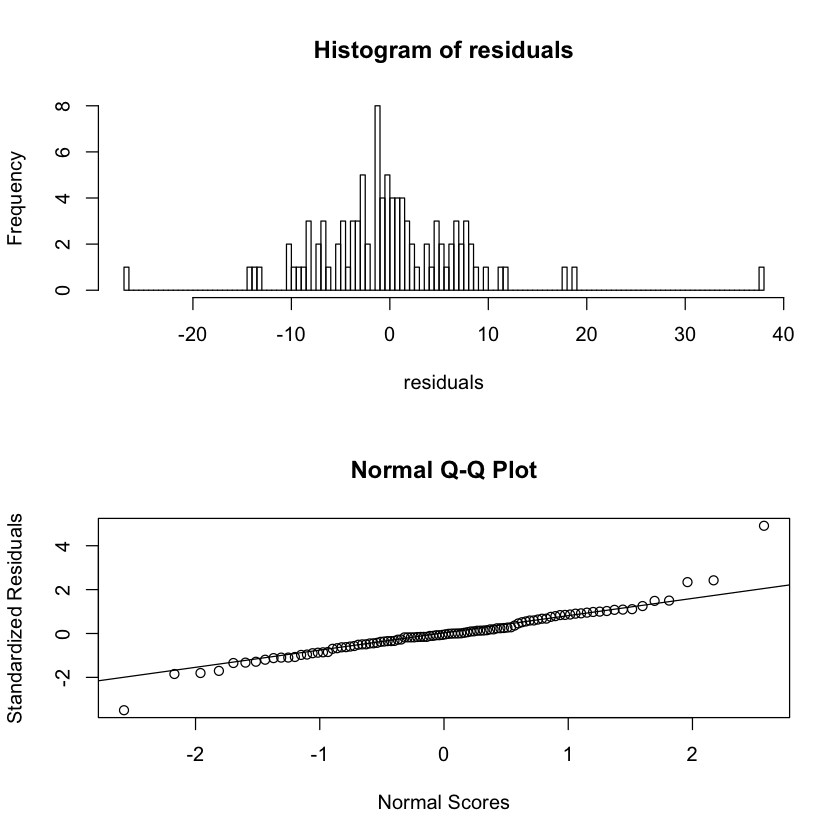

In [11]:
std_res = rstandard(lmodel)

par(mfrow = c(2,1))

hist(residuals, n = 100)

qqnorm(std_res, ylab="Standardized Residuals", xlab="Normal Scores")
qqline(std_res)

__It is safe to say that the linear regression is an appropiate method to use in this case.__

## 2. We will use the ‘mtcars’ dataset for this question. The dataset is already included in your R distribution. The dataset shows some of the characteristics of different cars. The following shows few samples (i.e. the first 6 rows) of the dataset.

In [12]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### a) James wants to buy a car. He and his friend, Chris, have different opinions about the Horse Power (hp) of cars. James thinks the weight of a car (wt) can be used to estimate the Horse Power of the car while Chris thinks the fuel consumption expressed in Mile Per Gallon (mpg), is a better estimator of the (hp). Who do you think is right? Construct simple linear models using mtcars data to answer the question.

In [13]:
mt_model <- lm(hp ~ mpg + wt, data = mtcars)
summary(mt_model)


Call:
lm(formula = hp ~ mpg + wt, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-59.42 -30.75 -12.07  24.82 141.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  349.287    103.509   3.374  0.00212 **
mpg           -9.417      2.676  -3.519  0.00145 **
wt            -4.168     16.485  -0.253  0.80217   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.65 on 29 degrees of freedom
Multiple R-squared:  0.6033,	Adjusted R-squared:  0.576 
F-statistic: 22.05 on 2 and 29 DF,  p-value: 1.505e-06


The summary of the model `mt_model` reveals that mpg is more statistically significant when determining horse power. The p-value is the metric in which we use to determine if a variable is statistically significant. In this case `mpg` is much more significant than `wt`.

In [14]:
print(anova(mt_model))

Analysis of Variance Table

Response: hp
          Df Sum Sq Mean Sq F value    Pr(>F)    
mpg        1  87791   87791 44.0414 2.825e-07 ***
wt         1    127     127  0.0639    0.8022    
Residuals 29  57808    1993                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


By using `anova` we can further be confident that `mpg` is much more important than `wt` when it comes to determining `hp` therefore Chris is right in this case.

### b) Build a model that uses the number of cylinders (cyl) and the mile per gallon (mpg) values of a car to predict the car Horse Power (hp).

In [21]:
mt_model_2 <- lm(hp ~ cyl + mpg, data = mtcars)
summary(mt_model_2)


Call:
lm(formula = hp ~ cyl + mpg, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-53.72 -22.18 -10.13  14.47 130.73 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   54.067     86.093   0.628  0.53492   
cyl           23.979      7.346   3.264  0.00281 **
mpg           -2.775      2.177  -1.275  0.21253   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.22 on 29 degrees of freedom
Multiple R-squared:  0.7093,	Adjusted R-squared:  0.6892 
F-statistic: 35.37 on 2 and 29 DF,  p-value: 1.663e-08


From analysing the summary of the model we can notice that the model is fairly accurate, the $r^{2}$ is __0.7093__ which means it can explain 70.93% of the data sets' variance.

We can also see that `mpg` has a negative correlation with `hp` meaning with every unit change in `mpg` `hp` will decrease by __2.775__ horse power. On the other hand, `cyl` has a positive correlation with `hp` meaning that with every unit change in `cyl` `hp` will increase by __23.979__ horse power.

#### I . Using this model, what is the estimated Horse Power of a car with 4 cyl and mpg of 22?

In [25]:
predict(
    mt_model_2,
    data.frame(cyl = 4, mpg = 22)
) %>%
    round(4)

1 
88.9362

The estimated house power will be __88.9362__

#### II. Construct an 85% confidence interval of your answer in the above question.

In [17]:
predict(
    mt_model_2,
    data.frame(cyl = 4, mpg = 22),
    interval = "prediction",
    level = 0.85
) %>%
    round(4)

,fit,lwr,upr
1,88.9362,28.5385,149.3339


The 85% prediction interval of `cyl =  4` and `mpg = 22` for a house power, `hp`, of __88.9362__ is between __28.5385__ and __149.3339__

## 3. For this question, we are going to use BostonHousing dataset. The dataset is in ‘mlbench’ package, so we first need to install the package, call the library and the load the dataset using the following commands

In [18]:
data(BostonHousing)   

head(BostonHousing)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### a) Build a model to estimate the median value of owner-occupied homes (medv) based on the following variables: crime crate (crim), proportion of residential land zoned for lots over 25,000 sq.ft (zn), the local pupil-teacher ratio (ptratio) and weather the whether the tract bounds Chas River(chas). Is this an accurate model?

In [19]:
bhouse_model <- lm(medv~crim + zn + ptratio + chas, data = BostonHousing)
summary(bhouse_model)


Call:
lm(formula = medv ~ crim + zn + ptratio + chas, data = BostonHousing)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.282  -4.505  -0.986   2.650  32.656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.91868    3.23497  15.431  < 2e-16 ***
crim        -0.26018    0.04015  -6.480 2.20e-10 ***
zn           0.07073    0.01548   4.570 6.14e-06 ***
ptratio     -1.49367    0.17144  -8.712  < 2e-16 ***
chas1        4.58393    1.31108   3.496 0.000514 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.388 on 501 degrees of freedom
Multiple R-squared:  0.3599,	Adjusted R-squared:  0.3547 
F-statistic: 70.41 on 4 and 501 DF,  p-value: < 2.2e-16


We can judge the accuracy of the model by using the $r^{2}$ that the `lm` model has computed. The value of $r^{2}$ is __0.3599__ which means that our model can only explain about 36% of the data variance.

With an $r^{2}$ of 36%, our model is not very accurate.

### b)	Use the estimated coefficient to answer these questions?

#### I. Imagine two houses that are identical in all aspects but one bounds the Chas River and the other does not. Which one is more expensive and by how much?

So given the summary of our model, we can see that the base case for our model in terms of it being bounded by the Chas River is `0` meaning the model automatically assumes that a house is not bounded by the Chas River and `1` other wise. Therefore according to the model a how which is bounded by the Chas river will be $4,584.93 more expensive than one that is not.


#### II. Imagine two houses that are identical in all aspects but in the neighborhood of one of them the pupil-teacher ratio is 15 and in the other one is 18. Which one is more expensive and by how much?

The coefficient of pupil-teacher ratio (`ptratio`) is -1.49367 which means that with every unit change in `ptratio` the price decreases by $1,493.67.

The pupil-teacher ratio increased by 3 units as one house has a pupil-teacher ratio of __15__ and the other __18__. Therefore the house with a pupil-teacher ratio of __18__ is $4,481.01 (1,493.67 * 3) less expensive than the house with  pupil-teacher ratio of __15__.

### c) Which of the variables are statistically important (i.e. related to the house price)?

By looking at the summary of our `bhouse_model` and focusing on the p-values of all the coefficient we can conclude that all the variables are statistically important. As the p-value of a variable's coefficient gets closer to 0 the more statistically important the variable is. 

### d) Use the anova analysis and determine the order of importance of these four variables.

In [20]:
print(anova(bhouse_model))

Analysis of Variance Table

Response: medv
           Df  Sum Sq Mean Sq F value    Pr(>F)    
crim        1  6440.8  6440.8 118.007 < 2.2e-16 ***
zn          1  3554.3  3554.3  65.122 5.253e-15 ***
ptratio     1  4709.5  4709.5  86.287 < 2.2e-16 ***
chas        1   667.2   667.2  12.224 0.0005137 ***
Residuals 501 27344.5    54.6                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In order to determine the order of importance of 4 variables we will use the values from `Sum Sq` to sort them. The order of importance then becomes

1. crim
2. ptratio
3. zn
4. chas